<a href="https://colab.research.google.com/github/pr4deepr/COUNTEN/blob/master/COUNTEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COUNTEN:Objective Analysis of enteric nervous system**
This notebook is based on the work by Kobayashi et al., 2021
eNeuro 15 July 2021, 8 (4) ENEURO.0092-21.2021;

**DOI**: https://doi.org/10.1523/ENEURO.0092-21.2021

**Github**: https://github.com/KLab-JHU/COUNTEN

A few changes have been made in how files are read and metadata accessed.
* Using aicsimageio for image reading and accessing metadata
* Changed some of the underlying code in the `processing.py` script as it returns a float error when running peak_local_max

The idea behind this notebook is to easily install COUNTEN and **interactively** perform segmentation of neurons/ganglia. The interactive part is being able to change the "sigma" and "min number of cells " parameters and visualising the changes in real time.

**TO DO:**

Batch analysis hasn't been implemented yet.

Tried it on tif files; haven't tested it on czi files yet



---


**Notebook written by:**

Pradeep Rajasekhar

Walter and Eliza Hall Institute of Medical Research, Melbourne, Australia


#### **How to start the notebook**

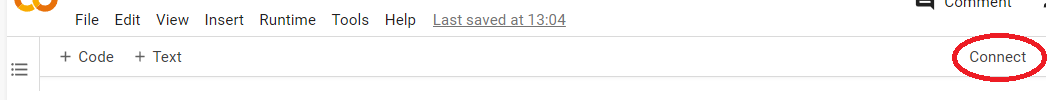

**Once you've started it, it will show a green tick like this:**


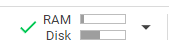

In [ ]:
#@markdown #Step 1: Run this cell to connect your Google Drive to colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Folder" icon on the Left, press the refresh button. Your Google Drive folder should now be available here as "gdrive". 

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

#**How to get the path of files in your google drive**

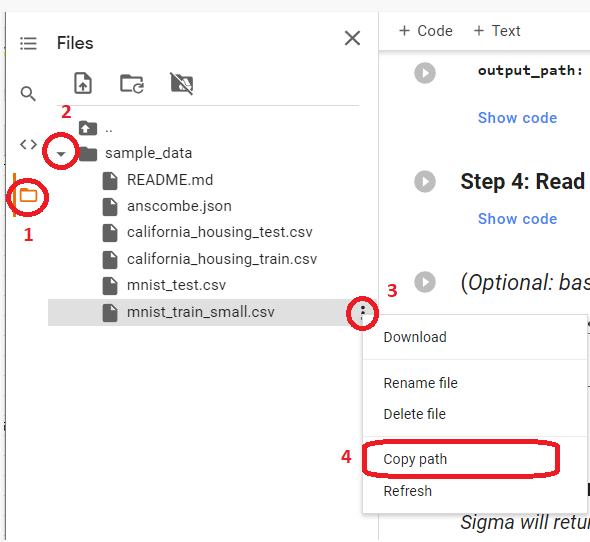

#**COUNTEN ANALYSIS**

In [ ]:
#@markdown ##**Step 2: Click Play to Install COUNTEN and configure dependencies**

#Should consider using specific versions of each library to avoid future dependency errors
!pip install scikit-image pandas aicsimageio scikit-learn aicsimageio bioformats_jar

#To avoid error in aicsimageio TypeError: load() missing 1 required positional argument: 'Loader'
#Error related to dask distributed being an older version

!pip install pip install distributed==2022.01.0
#pyyaml==5.4.1 distributed 1.25.3
#!pip install scikit-learn==1.0.0
import os, shutil
curr_dir=os.getcwd()
counten_dir=curr_dir+os.sep+"COUNTEN"+os.sep
if(os.path.isdir(counten_dir)):
  shutil.rmtree(counten_dir)
!git clone https://github.com/pr4deepr/COUNTEN #https://github.com/KLab-JHU/COUNTEN

script_path=counten_dir+"scripts"+os.sep
os.chdir(counten_dir)

#FONTS
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
print(color.BOLD +"Counten is installed at",counten_dir+ color.END)
print(color.BOLD +"Counten scripts are located at",script_path+ color.END)



### You will need to have your images within google drive to perform the analysis. We mount google drive in step 1. Follow instructions in Step 1 to copy the path and paste it below.

In [ ]:
#@markdown ### **Step 3: Specify directory with images of neurons**
#@markdown ### **and save location**

Neuron_Image_Location = "" #@param {type:"string"}
neuron_image_path=Neuron_Image_Location

#@markdown ### **Enter folder location where you want to save the results**
output_path = "" #@param {type:"string"}



In [ ]:
#@markdown ### **Step 4: Read image (*.tif) and detect metadata**
#%load_ext autoreload
#%autoreload 2
#%reload_ext autoreload

import warnings
warnings.filterwarnings('ignore')

import os
import shutil

from scripts import processing,analysis

from aicsimageio import imread, AICSImage
from aicsimageio.readers.bioformats_reader import BioformatsReader

import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

neuron_aics=imread(neuron_image_path)
#neurons=neurons[0,0,0,:,:]
neuron_meta=AICSImage(neuron_image_path)
meta={}
meta['AcquisitionDate']=""
meta['Name']=os.path.splitext(os.path.basename(neuron_image_path))[0]
meta['SizeC']=neuron_meta.dims.C
meta['SizeT']=neuron_meta.dims.T
meta['SizeX']=neuron_meta.dims.X
meta['SizeY']=neuron_meta.dims.Y
meta['SizeZ']=neuron_meta.dims.Z
meta['DimensionOrder']=neuron_meta.dims

if neuron_meta.physical_pixel_sizes.X is None:
  bioformats_meta = BioformatsReader(neuron_image_path)
  pixel_size = bioformats_meta.physical_pixel_sizes
else:
  pixel_size = neuron_meta.physical_pixel_sizes

#cannot read pixel size from image, so defining manually
meta['PhysicalSizeX'] = pixel_size.X
meta['PhysicalSizeY'] = pixel_size.Y
meta['PhysicalSizeZ'] = 1 #neuron_meta.physical_pixel_sizes.Z

directory=os.path.dirname(neuron_image_path)

if meta['PhysicalSizeX'] is None:
  print(color.BOLD+color.RED+"\nEnter pixel density or XY pixel size manually below"+ color.END)
  manual=True
else:
  manual=False
  print(color.BOLD+color.GREEN+"Pixel Density:",str(meta['PhysicalSizeX'])+color.END)
  pixel_density=1/meta['PhysicalSizeX']
  print(color.BOLD+color.GREEN+"XY pixel size (um):",str(pixel_density)+color.END)
  print(color.BOLD+color.GREEN+"Pixel size is determined from image"+color.END )
  
print("\n")
neurons=neuron_aics[0,0,0,:,:]
plt.imshow(neurons)
plt.axis('off')

#import javabridge
#import bioformats
#BFPATH = '/usr/local/lib/python3.7/dist-packages/bioformats/jars/bioformats_package.jar'
#jars = javabridge.JARS + [BFPATH]
#javabridge.start_vm(class_path=jars)

#, directory, meta = counten_io.load_TIFF(neuron_image_path, output_path)

#javabridge.kill_vm()

In [ ]:
# @markdown ### (*Optional: based on output from Step 4*). If you have to enter pixel density or XY pixel size, please choose the option and enter below
option = "Pixel Density (um)" #@param ["Pixel Density (um)", "XY pixel size (um)"]
value=0.368  #@param {type:"number"}
if manual:
  if option=="Pixel Density (um)":
    pixel_density=value
    meta['PhysicalSizeX']=1/pixel_density
    meta['PhysicalSizeY']=1/pixel_density
  else:
    meta['PhysicalSizeX']=value
    meta['PhysicalSizeY']=value
    pixel_density=1/meta['PhysicalSizeX']
else:
  print("Pixel size already determined from image")
    
    
print("Pixel Density:",meta['PhysicalSizeX'] )
print("XY pixel size (um):",pixel_density )

In [ ]:
#@markdown ## **Step 5: Click Play to run the Iteractive Neuron detection and ganglia segmentation**
#@markdown #### *Sigma will return the local maxima within "sigma" value specified. Increase sigma if too many cell detected*
#@markdown #### *Minimum Sample is the min no of neurons required to be defined as a ganglia (default:3 as per Kobayashi et al. 2021)*
#@markdown #### *The image on the left are the neurons detected. Image on the right are the ganglia defined*


from ipywidgets import interact
import ipywidgets as widgets

#from IPython.display import clear_output

sigma_interact = widgets.IntSlider(value=5, min=1, max=20)
min_samples_interact = widgets.IntSlider(value=3, min=1, max=20)

neurons=neuron_aics[0,0,0,:,:]

def clusters(sigma_interact,min_samples_interact): 
    #clear_output(wait=True)
    clusters.local_maxi, clusters.labels, clusters.gauss = processing.wide_clusters(neurons,
                         sigma=sigma_interact, 
                         pixel_density=pixel_density,
                         min_samples=min_samples_interact)
    #return local_maxi,labels,gauss
output = widgets.interactive_output(clusters, {'sigma_interact': sigma_interact,'min_samples_interact': min_samples_interact})
#out2 = widgets.interactive_output(clusters, )

display("Sigma: ",sigma_interact)
display("Minimum Samples: ", min_samples_interact)
display(output)


##local_maxi=output.keys
#labels=
#gauss=

In [ ]:
#@markdown ##**Step 6: Calculate neuron number and ganglia metrics**
#@markdown ## Use sigma and minimum samples defined above to calculate the number of neurons and ganglia parameters
#del neurons 
#@markdown ## Tick box below to save image and table

save_data = True #@param {type:"boolean"}

sigma=sigma_interact.value
min_samples=min_samples_interact.value

print("Using sigma of",sigma,"and minimum sample of", min_samples)
ganglion_prop = processing.segmentation(clusters.gauss, clusters.local_maxi, clusters.labels, meta, directory=output_path, save = save_data)
#del clusters.gauss
df, dist = analysis.create_dataframe(ganglion_prop, clusters.labels, clusters.local_maxi, meta, directory=output_path, save=save_data)
df

In [ ]:
print("Used sigma of",sigma,"and minimum sample of", min_samples)